In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
from sklearn.datasets import make_circles


In [52]:
np.random.seed(0)
X, y = make_circles(n_samples=200)

(200, 3)

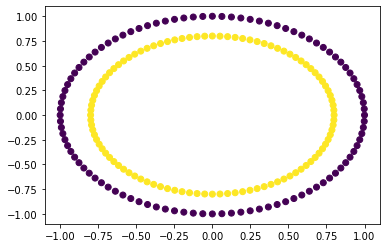

In [54]:
plt.scatter(X[:, 0], X[:, 1],c=y)
X_concat = np.hstack((np.ones((len(y), 1)), X))
X_concat.shape

In [59]:
w1

w1 ~ Normal

In [61]:
basic_model = pm.Model()
shapes = [4, 5, 1]

with basic_model:
    w1 = pm.Normal("w1", mu=0, sigma=10, shape=(X_concat.shape[1], shapes[0]))
    w2 = pm.Normal("w2", mu=0, sigma=10, shape=(shapes[0], shapes[1]))
    w3 = pm.Normal("w3", mu=0, sigma=10, shape=(shapes[1], shapes[2]))
                   
    X_ = pm.Data('features', X_concat)
    # Expected value of outcome
    
    a_1 = pm.math.sigmoid(tt.dot(X_, w1))
    a_2 = pm.math.sigmoid(tt.dot(a_1, w2))
    a_3 = pm.math.sigmoid(tt.dot(a_2, w3))
    
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Bernoulli("Y_obs", p=a_3, observed=y)

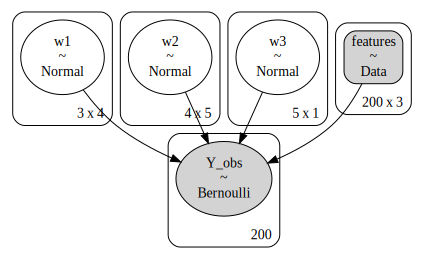

In [62]:
pm.model_to_graphviz(basic_model.model)


In [63]:
import seaborn as sns
import pymc3 as pm
import arviz as az
import theano.tensor as tt

In [97]:
map_estimate = pm.find_MAP(model=basic_model)

In [98]:
map_estimate

{'w1': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 'w2': array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 'w3': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])}

In [89]:
with basic_model:
    inference = pm.ADVI()
    approx = pm.fit(n=300, method=inference)

Finished [100%]: Average Loss = 2.4471e+05


In [91]:
trace = approx.sample(draws=50)


In [67]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(20,return_inferencedata=False,tune=10)

Only 20 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w3, w2, w1]


Sampling 4 chains for 10 tune and 20 draw iterations (40 + 80 draws total) took 18 seconds.
/usr/local/anaconda3/lib/python3.8/site-packages/pymc3/sampling.py:642: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9998748438527691, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.


/usr/local/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff26d65d730>,
      dtype=object)

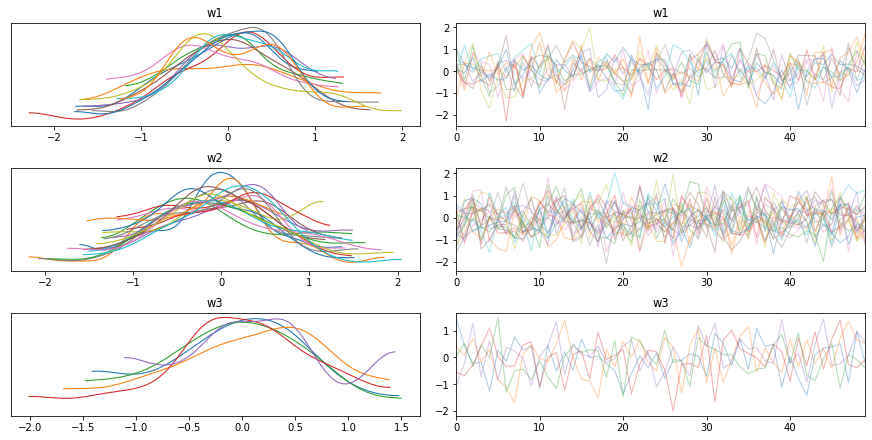

In [92]:
az.plot_trace(trace)

In [93]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [94]:
X_test = np.c_[xx.ravel(), yy.ravel()]
X_test_concat = np.hstack((np.ones((len(X_test), 1)), X_test))
X_test_concat.shape

(1600, 3)

In [95]:
with basic_model:
    pm.set_data({'features': X_test_concat})
    posterior = pm.sample_posterior_predictive(trace)

In [96]:
posterior['Y_obs'].shape, X_test_concat.shape

((50, 1600, 200), (1600, 3))

In [80]:
for i in range(len(Z))[:500]:
    plt.contour(xx, yy, Z[i].reshape(xx.shape), alpha=0.01)
plt.scatter(X[:, 0], X[:, 1],c=y, zorder=10)

ValueError: cannot reshape array of size 1 into shape (40,40)

FOllowing code inspired from": https://docs.pymc.io/notebooks/bayesian_neural_network_advi.html

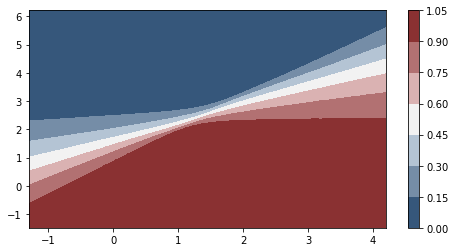

In [41]:
pred = posterior['Y_obs'].mean(axis=0)>0.5
cmap = sns.diverging_palette(250, 12, s=85, l=25, as_cmap=True)
fig, ax = plt.subplots(figsize=(8, 4))
contour = plt.contourf(xx, yy, posterior['Y_obs'].mean(axis=0).reshape(xx.shape),cmap=cmap)
#ax.scatter(X_test[pred == 0, 0], X_test[pred == 0, 1])
#ax.scatter(X_test[pred == 1, 0], X_test[pred == 1, 1], color="r")
cbar = plt.colorbar(contour, ax=ax)
#_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel="X", ylabel="Y")
#cbar.ax.set_ylabel("Posterior predictive mean probability of class label = 0");


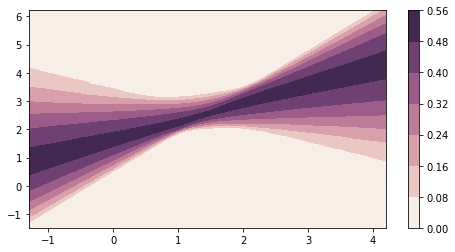

In [43]:
pred = posterior['Y_obs'].mean(axis=0)>0.5
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax = plt.subplots(figsize=(8, 4))
contour = plt.contourf(xx, yy, posterior['Y_obs'].std(axis=0).reshape(xx.shape),cmap=cmap)
#ax.scatter(X_test[pred == 0, 0], X_test[pred == 0, 1])
#ax.scatter(X_test[pred == 1, 0], X_test[pred == 1, 1], color="r")
cbar = plt.colorbar(contour, ax=ax)
#_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel="X", ylabel="Y")
#cbar.ax.set_ylabel("Posterior predictive mean probability of class label = 0");